In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
np.random.seed(42)

In [3]:
single_label = np.random.randint(0, 2)
single_label

0

In [15]:
def generate_data(num_samples, num_features=2):
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size=data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, size=labels_size)
    return data.astype(np.float32), labels

In [16]:
train_data, labels = generate_data(11)
train_data

array([[ 51.,  92.],
       [ 14.,  71.],
       [ 60.,  20.],
       [ 82.,  86.],
       [ 74.,  74.],
       [ 87.,  99.],
       [ 23.,   2.],
       [ 21.,  52.],
       [  1.,  87.],
       [ 29.,  37.],
       [  1.,  63.]], dtype=float32)

In [17]:
train_data[0], labels[0]

(array([ 51.,  92.], dtype=float32), array([1]))

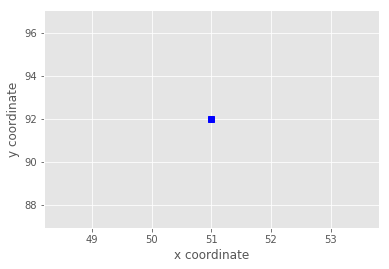

In [18]:
plt.plot(train_data[0, 0], train_data[0, 1], 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

In [19]:
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

In [20]:
labels.ravel() == 0

array([False,  True,  True, False, False, False,  True, False,  True,
        True,  True], dtype=bool)

In [21]:
blue = train_data[labels.ravel() == 0]
red = train_data[labels.ravel() == 1]

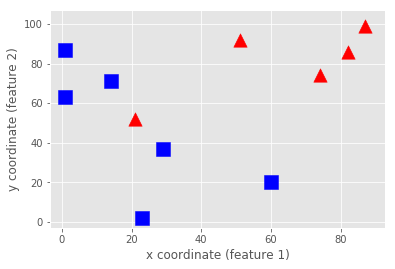

In [22]:
plot_data(blue, red)

In [23]:
knn = cv2.ml.KNearest_create()

In [24]:
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [25]:
newcomer, _ = generate_data(1)
newcomer

array([[ 58.,  41.]], dtype=float32)

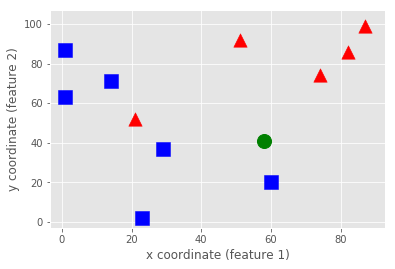

In [26]:
plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14);

In [27]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[ 0.]]
Neighbor's label:	 [[ 0.]]
Distance to neighbor:	 [[ 445.]]


In [28]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 5)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[ 1.]]
Neighbor's label:	 [[ 0.  0.  1.  1.  1.]]
Distance to neighbor:	 [[  445.   857.  1345.  1490.  2601.]]


In [29]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[ 1.]]
Neighbor's label:	 [[ 0.  0.  1.  1.  1.  1.  0.]]
Distance to neighbor:	 [[  445.   857.  1345.  1490.  2601.  2650.  2746.]]
